<a href="https://colab.research.google.com/github/EkamjotKaur19/NLP-Projects/blob/main/CommentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comments Analysis**

#Installing packages and importing libraries

In [ ]:
pip install rake_nltk

In [ ]:
pip install emojis

In [ ]:
pip install spellchecker

In [ ]:
pip install wordcloud

In [ ]:
import string
import nltk
import emojis
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.stem import WordNetLemmatizer
from rake_nltk import Rake
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import unicodedata

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# Reading comments in text

In [ ]:
path = '/content/Instacomments.xlsx'
df = pd.read_excel(path)

text=df['text']
print(text)

0      Why it's taking so long to get your product de...
1      Hey I please send my order details or the day ...
2                        Hey place send my order details
3                              Please send order details
4      Hello .. I’m using  your alpha arbutin during ...
                             ...                        
775                 Can i use this serum. For back acne?
776    Hey i have ordered granative retinoid for acne...
777           Can i use retinoid for acne pits and scars
778    After using it at night when to use Sunscreen....
779    @beminimalist__ hi after using this peel my sk...
Name: text, Length: 780, dtype: object


# Function for Sentiment Analysis

In [ ]:
def sentiment_analysis(comments):
  sia = SentimentIntensityAnalyzer()
  positive_count = 0
  neutral_count = 0
  negative_count = 0

  # Perform sentiment analysis on each comment
  for comment in comments:
      # Calculate sentiment scores
      sentiment_scores = sia.polarity_scores(comment)

      # Interpret sentiment scores
      if sentiment_scores['compound'] >= 0.05:
          positive_count += 1
      elif sentiment_scores['compound'] <= -0.05:
          negative_count += 1
      else:
          neutral_count += 1

  # Print the number of positive, neutral, and negative comments
  print("Positive Comments:", positive_count)
  print("Neutral Comments:", neutral_count)
  print("Negative Comments:", negative_count)
  categories = ['Positive', 'Neutral', 'Negative']
  counts = [positive_count, neutral_count, negative_count]

  plt.bar(categories, counts)
  plt.xlabel('Sentiment')
  plt.ylabel('Count')
  plt.title('Sentiment Analysis of Comments')
  plt.show()

Positive Comments: 371
Neutral Comments: 353
Negative Comments: 56


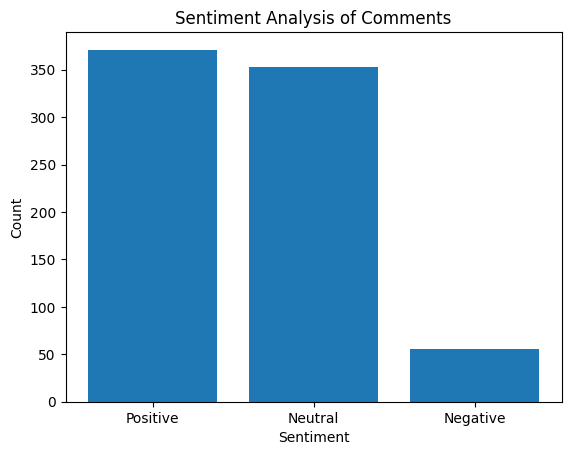

In [ ]:
sentiment_analysis(text)

# Keyphrase Extraction using RAKE

In [ ]:
def get_wordmap(texts, stop_words):
    rake = Rake(max_length=4)
    lemmatizer = WordNetLemmatizer()
    wordmap = {}

    for text in texts:
        try:
            text = text.lower()
            text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
            for i in emojis.iter(text):
                text = text.replace(i, '')
            text = text.translate(str.maketrans('', '', string.punctuation))
            words = text.split()
            words = [word for word in words if word not in stop_words]
            lemmatized_words = [lemmatizer.lemmatize(word, pos='n') for word in words]
            text = ' '.join(lemmatized_words)
            rake.extract_keywords_from_text(text)
            phrase_scores = rake.get_ranked_phrases_with_scores()
            phrases = [phrase for score, phrase in phrase_scores]

            for phrase in phrases:
                if phrase not in wordmap:
                    wordmap[phrase] = 0
                wordmap[phrase] += 1
        except Exception as ex:
            pass
    return wordmap

In [ ]:
wordmap=get_wordmap(text, stop_words)
print(wordmap)

{'taking product delivered': 2, 'send order detail': 4, 'white head open pore': 2, 'serum dark mark hyperpigmentation': 2, 'shape oily': 2, 'start retinol': 2, 'retinol find website': 1, 'check dm': 9, 'dm advice': 2, 'exfoliator reduce tan hand': 2, 'glycolic': 2, 'niacinamide lotion nykaa': 2, 'beminimalist sunscreen face': 2, 'beminimalist': 4, 'price sunscreen': 2, 'moisturizer alpha arbutin serum': 2, 'guy cheater': 2, 'care dry': 2, 'vitamin b5 mosturiser': 2, 'order excited': 2, 'pls reply dm': 2, 'ceramides': 2, 'increase quantity lotion tooo': 2, 'yeah minimalist moisturizer quality': 2, 'retinol canatmt find website': 1, 'find aquaporin cleanser': 1, 'beminimalist plz check dm': 1, 'check dm exciting opportunityytm': 1, 'dry dehydrated flaky': 1, 'checkout dm team': 1, 'harm apply face': 2, 'cruelty free': 2, 'face': 6, 'order website': 2, 'honestly love minimalistai': 2, 'ordered': 2, 'planning launch spf 40': 2, 'price': 8, 'apply face': 2, 'scalp': 2, 'result': 2, 'release

# Generation of Word Cloud to highlight important comments

In [ ]:
def generate_wordcloud(wordmap):
    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordmap)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

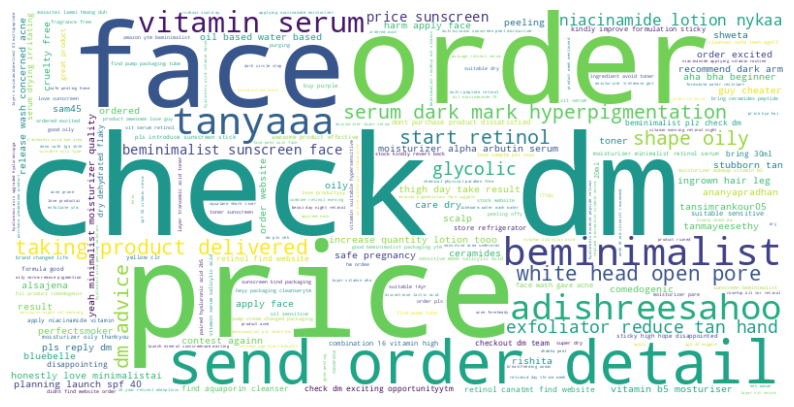

In [ ]:
generate_wordcloud(wordmap)